In [4]:
import mne 
mne.set_log_level('error')

p_id="sub-001"
data_dir='data/' + p_id + '/'

epochs = mne.read_epochs(data_dir + p_id + '-arg-epo.fif', preload=True)

In [6]:
conditions = ['Match','Mismatch']
evokeds = {c:epochs[c].average() for c in conditions}
evokeds

{'Match': <Evoked | '0.25 × Match/A + 0.25 × Match/C + 0.25 × Match/B + 0.25 × Match/D' (average, N=72), -0.1 – 1 s, baseline -0.1 – 0 s, 16 ch, ~99 kB>,
 'Mismatch': <Evoked | '0.25 × Mismatch/A + 0.24 × Mismatch/C + 0.25 × Mismatch/B + 0.25 × Mismatch/D' (average, N=71), -0.1 – 1 s, baseline -0.1 – 0 s, 16 ch, ~99 kB>}

plot average erp over each separate condition in the evokeds list   

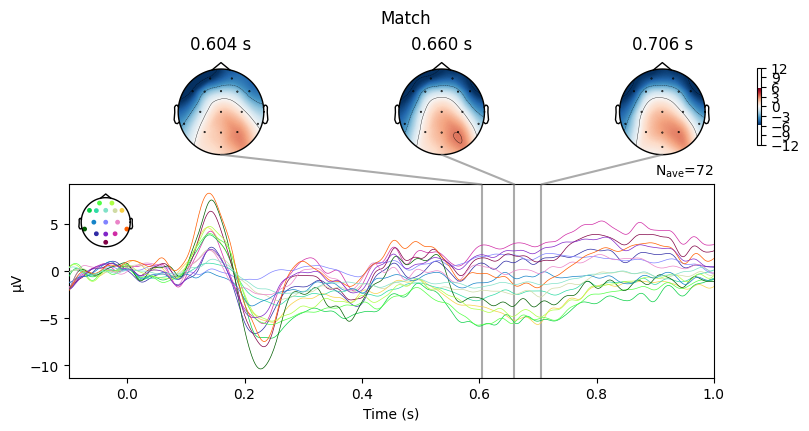

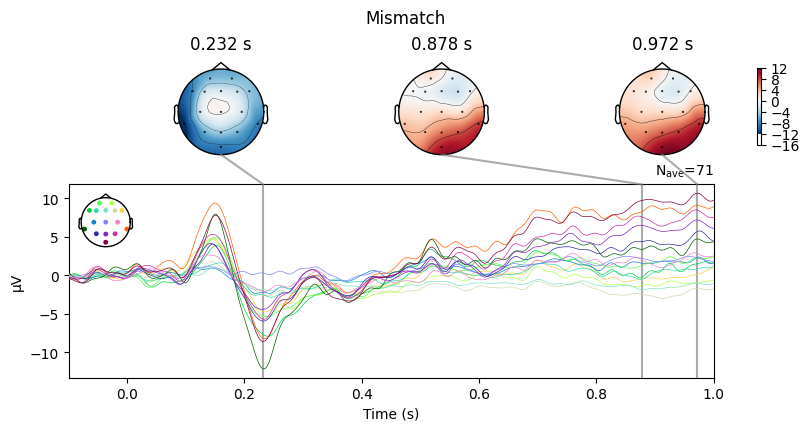

In [9]:
for c in evokeds.keys():
    evokeds[c].plot_joint(title=c)

viewing contrasts between conditions - we expect N400 component that should be more negative for mismatches than matches

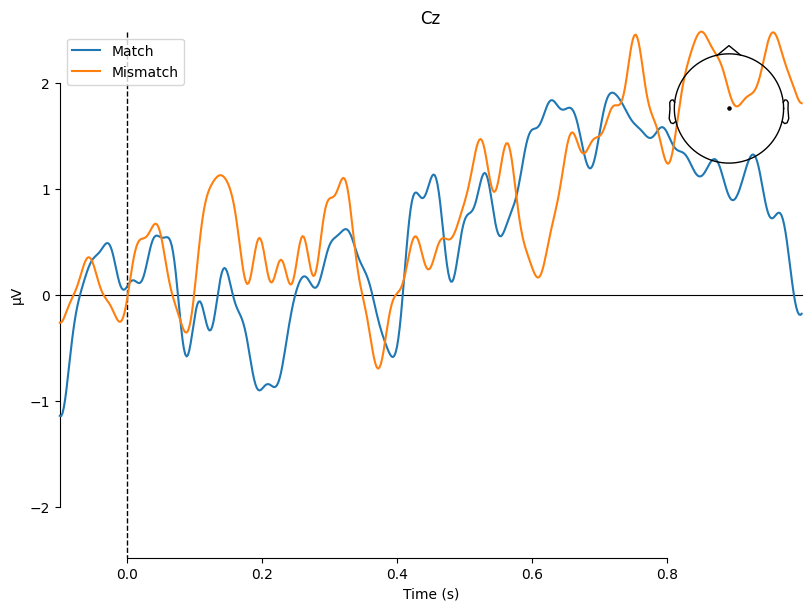

[<Figure size 800x600 with 2 Axes>]

In [10]:
mne.viz.plot_compare_evokeds(evokeds,picks='Cz')

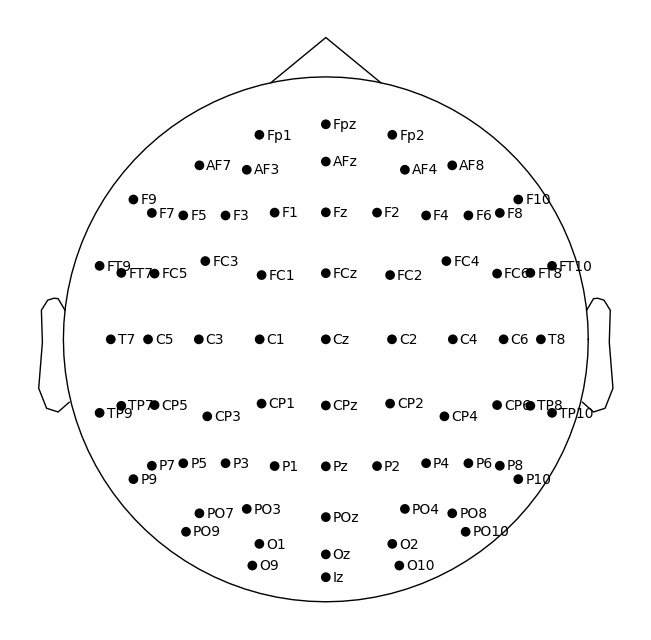

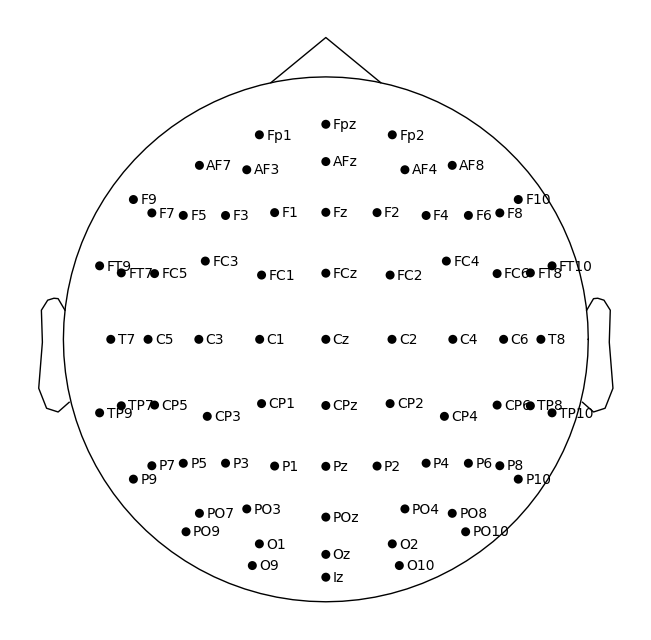

In [12]:
std_montage = mne.channels.make_standard_montage("easycap-M1")
std_montage.plot()

plotting central channels to compare voltage across them

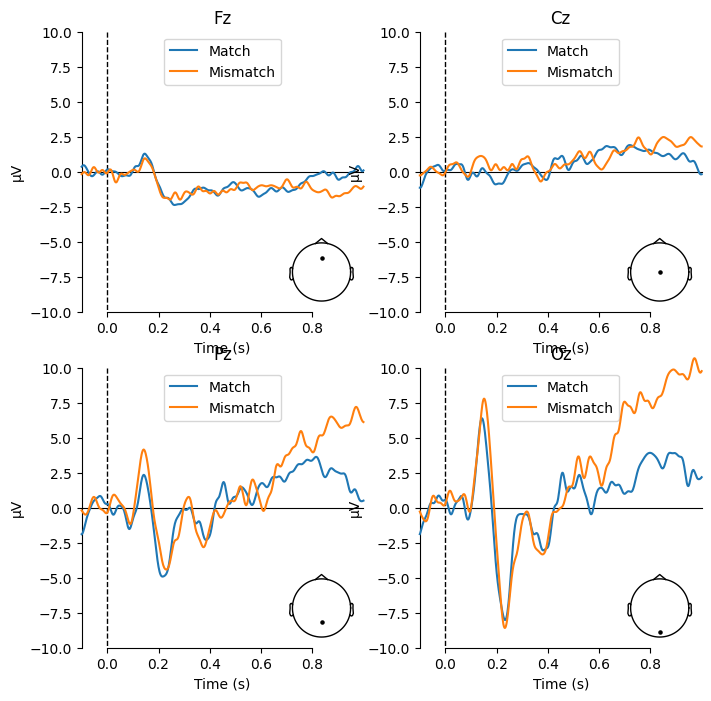

In [15]:
import matplotlib.pyplot as plt

#define channels we want to plot
channels = ['Fz','Cz','Pz','Oz']

#figure and subplots
fig,axes = plt.subplots(2,2,figsize=(8,8))

#plot each channel in a subplot
for i,channel in enumerate(channels):
    mne.viz.plot_compare_evokeds(evokeds,picks=channel,axes=axes[i//2,i%2],ylim={'eeg':(-10,10)},show_sensors='lower right',legend="upper center",
                                show=False)
plt.show()



scalp topomap in light of new information


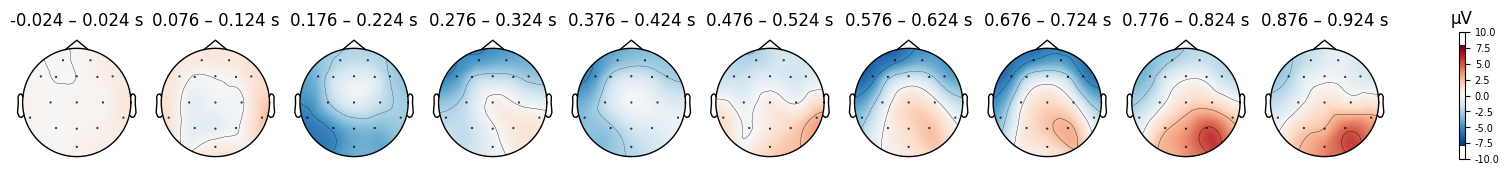

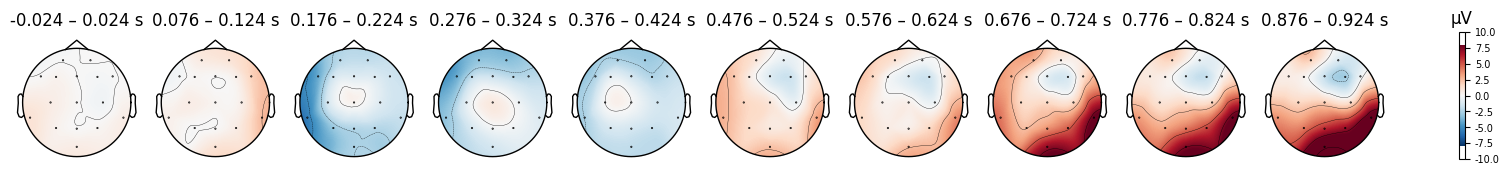

In [18]:
import numpy as np
times = np.arange(0,np.max(epochs.times),0.1)

for condition in evokeds.keys():
    evokeds[condition].plot_topomap(times=times,average=0.050,vlim=(-8,8))


re-referencing evokeds potentials to average eeg values

In [19]:
evokeds_avgref = {c:evokeds[c].copy().set_eeg_reference(ref_channels="average") for c in evokeds.keys()}

comparing plots of re-references to avg potential evokeds vis a vis the original Fcz evoked potentials

Matchaveraged reference


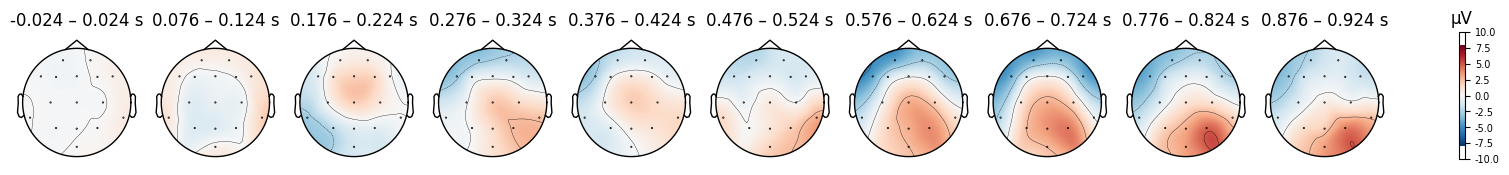

Matchoriginal Fcz reference


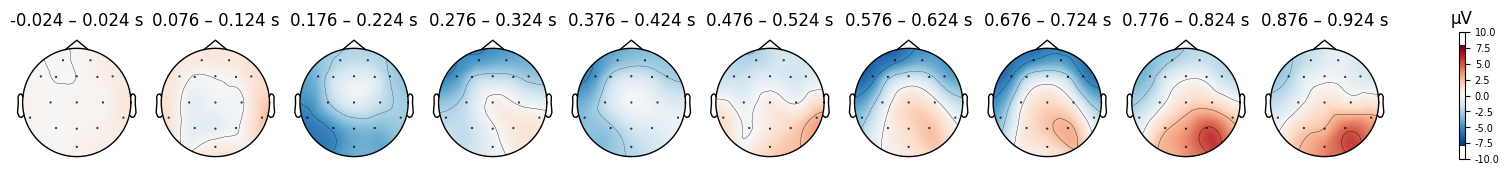

Mismatchaveraged reference


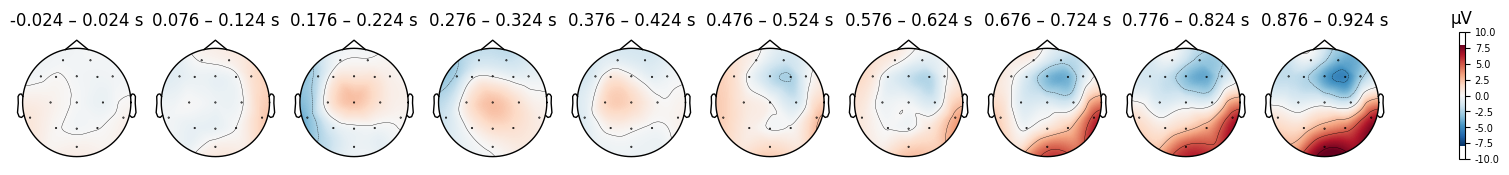

Mismatchoriginal Fcz reference


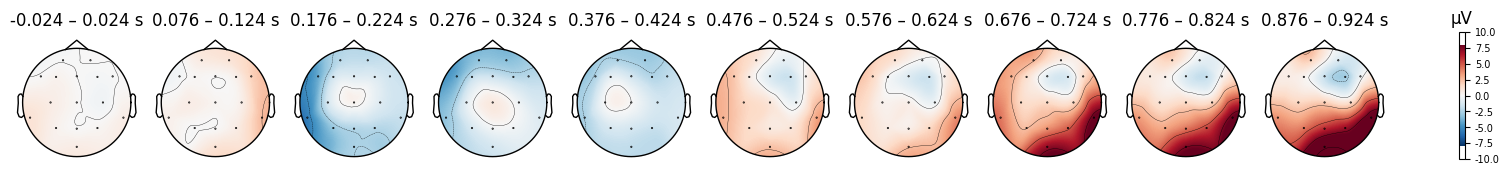

In [20]:
for condition in evokeds_avgref.keys():
    print(condition + "averaged reference")
    evokeds_avgref[condition].plot_topomap(times=times,average=0.050,vlim=(-8,8))

    print(condition + "original Fcz reference")
    evokeds[condition].plot_topomap(times=times,average=0.050,vlim=(-8,8))

waveform time series plots at midline electrodes with average reference

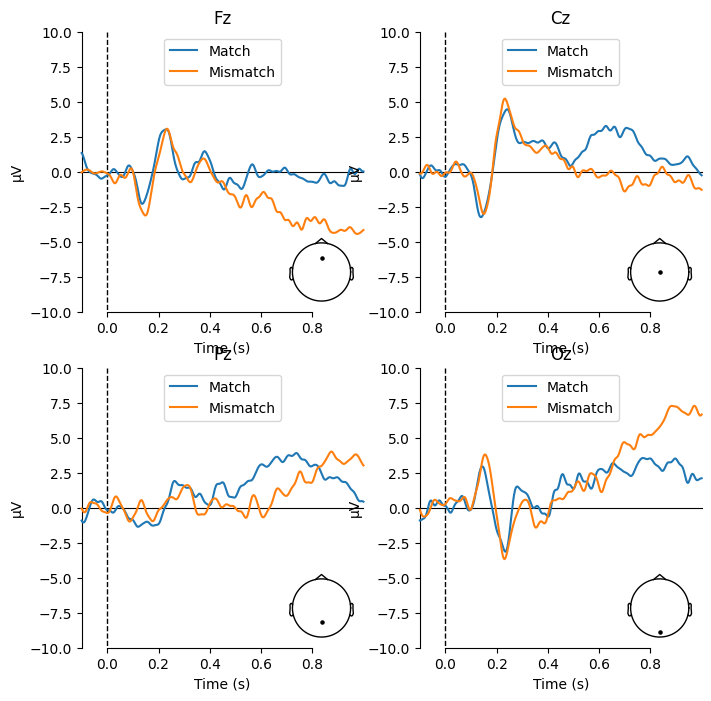

In [25]:
fig,axes = plt.subplots(2,2,figsize=(8,8))

#plot each channel in a diff sub plot
for i,channel in enumerate(channels):
    mne.viz.plot_compare_evokeds(evokeds_avgref,picks=channel,ylim={'eeg':(-10,10)},show_sensors='lower right',legend="upper center",axes=axes.reshape(-1)[i],show=False)
plt.show()


re-reference the data to mastoid reference 

In [28]:
evokeds_mastoidref = {c:evokeds[c].copy().set_eeg_reference(ref_channels=['TP9','TP10']) for c in evokeds.keys()}

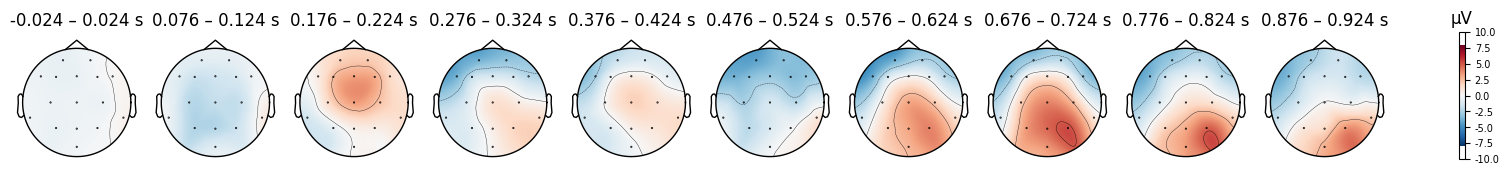

Matchaveraged reference


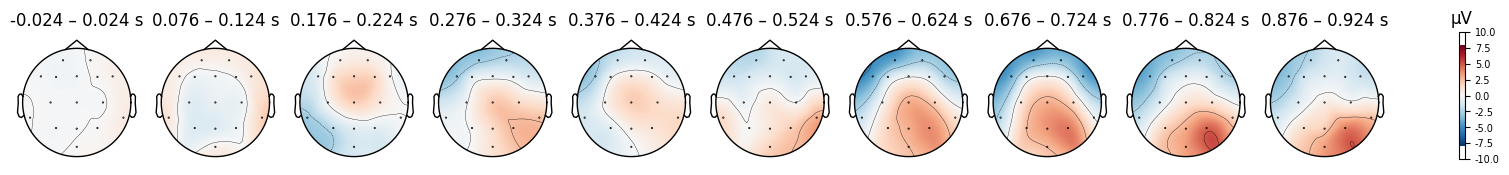

Matchoriginal Fcz reference


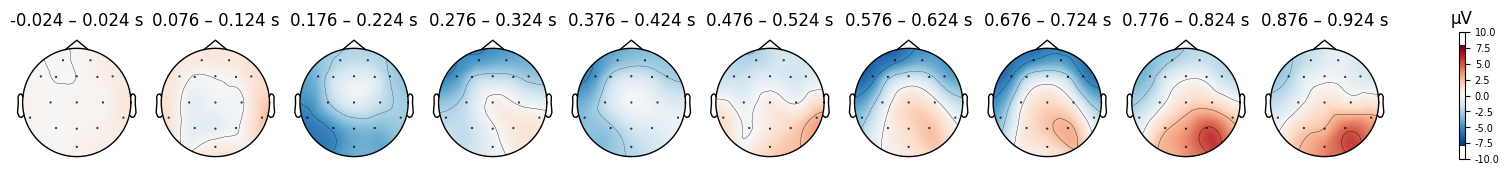

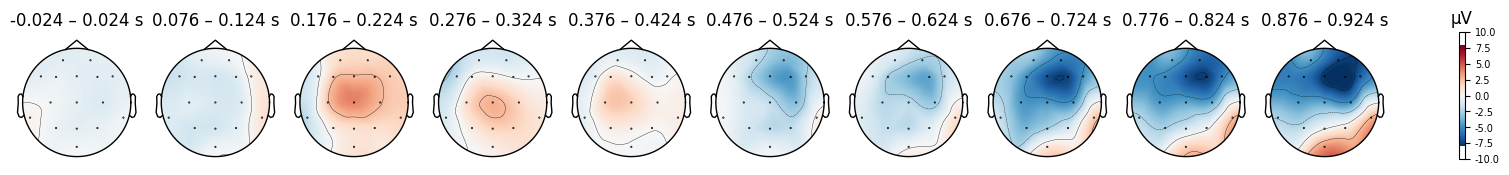

Mismatchaveraged reference


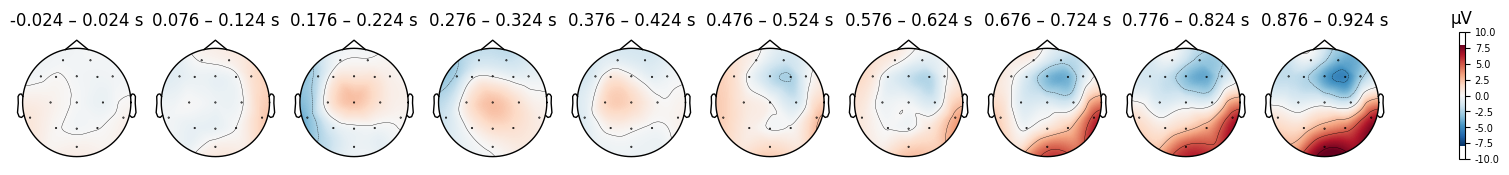

Mismatchoriginal Fcz reference


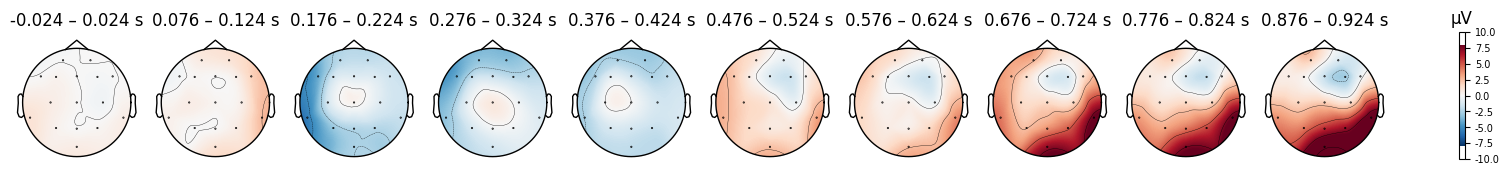

In [29]:
#topomaps with mastoid reference

for c in evokeds_mastoidref.keys():
    evokeds_mastoidref[c].plot_topomap(times=times,average=0.050,vlim=(-8,8))

    print(c + "averaged reference")
    evokeds_avgref[c].plot_topomap(times=times,average=0.050,vlim=(-8,8))

    print(c+"original Fcz reference")
    evokeds[c].plot_topomap(times=times,average=0.050,vlim=(-8,8))

waverform time series data at midline channels with mastoid reference

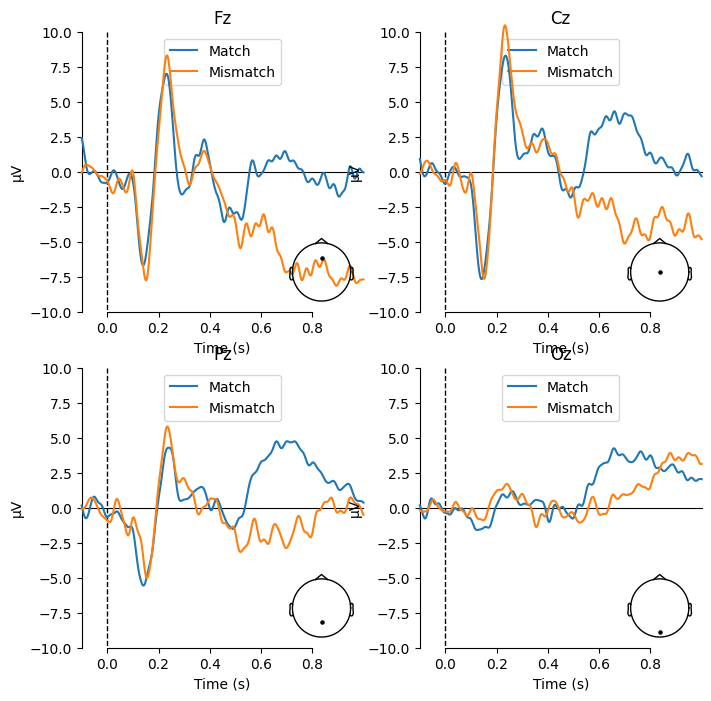

In [32]:
fig,axes = plt.subplots(2,2,figsize=(8,8))

for i,chan in enumerate(channels):
    mne.viz.plot_compare_evokeds(evokeds_mastoidref,picks=chan,ylim={'eeg':(-10,10)},show_sensors='lower right',legend="upper center",axes=axes.reshape(-1)[i],show=False)
plt.show()


compare mismatch waveforms across various references



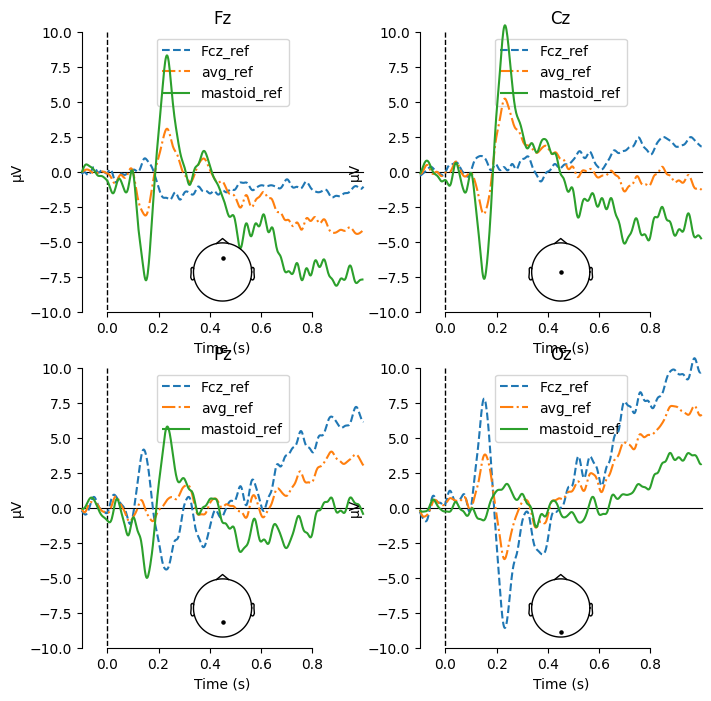

In [37]:
fig,axes = plt.subplots(2,2,figsize=(8,8))

linestyle_dict = {"Fcz_ref":"--","avg_ref":"-.","mastoid_ref":"-"}

for i,chan in enumerate(channels):
    mne.viz.plot_compare_evokeds({"Fcz_ref":evokeds['Mismatch'],
                                 "avg_ref":evokeds_avgref['Mismatch'],
                                 "mastoid_ref":evokeds_mastoidref['Mismatch']},
                                 picks=chan,
                                 ylim={'eeg':(-10,10)},
                                 show_sensors="lower center",
                                 legend="upper center",
                                 linestyles=linestyle_dict,
                                 axes=axes.reshape(-1)[i],
                                 show=False);
plt.show()

create diff waves with differences of waveforms between conditions - a big diff would suggest experiemental condition while zero would not

In [43]:
evoked_diff = mne.combine_evoked([evokeds['Mismatch'],
                                    evokeds['Match']],weights=[1,-1])

evoked_diff_avg = mne.combine_evoked([evokeds_avgref['Mismatch'],
                                      evokeds_avgref['Match']],weights=[1,-1])
evoked_diff_mastoid = mne.combine_evoked([evokeds_mastoidref['Mismatch'],
                                            evokeds_mastoidref['Match']],weights=[1,-1])




plotting difference waves

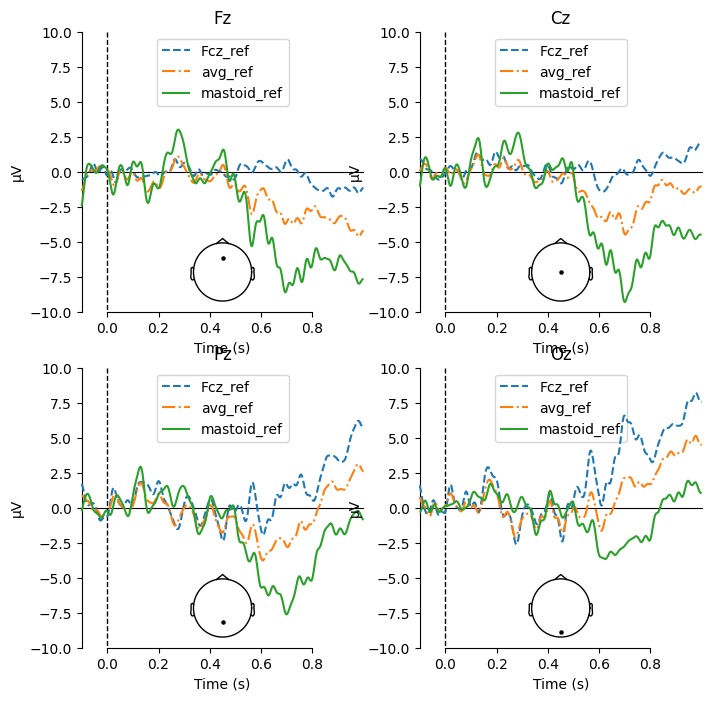

In [45]:
fig,axes = plt.subplots(2,2,figsize=(8,8))

for i,chan in enumerate(channels):
    mne.viz.plot_compare_evokeds({"Fcz_ref":evoked_diff,
                                 "avg_ref":evoked_diff_avg,
                                 "mastoid_ref":evoked_diff_mastoid},picks=chan,
                                 ylim={'eeg':(-10,10)},
                                 show_sensors="lower center",
                                 legend="upper center",
                                 linestyles=linestyle_dict,
                                 axes=axes.reshape(-1)[i],
                                 show=False)
plt.show()


plotting scalp topological maps of difference potentials

Mismatchoriginal Fcz reference


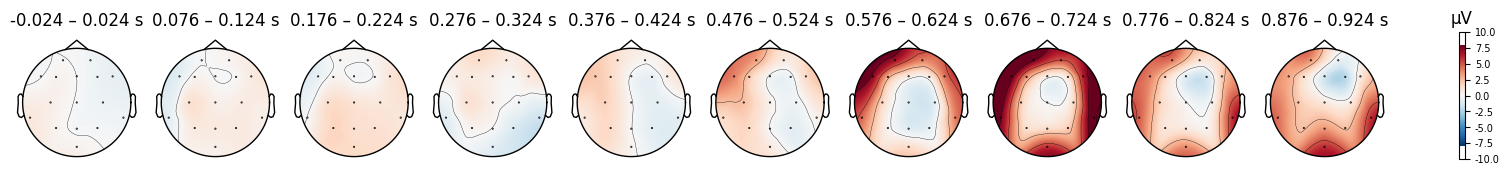

Mismatchaveraged references


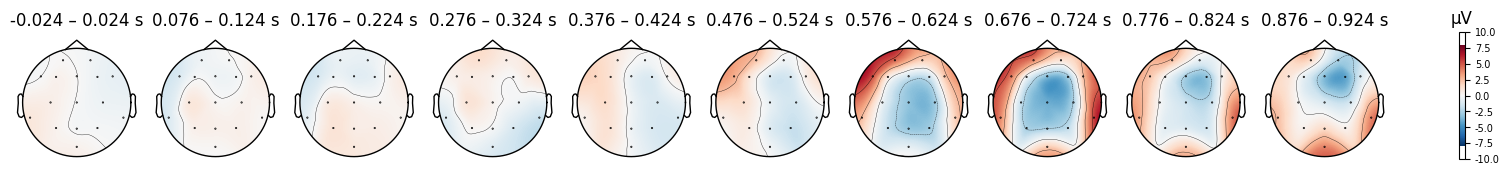

Mismatchmastoid reference


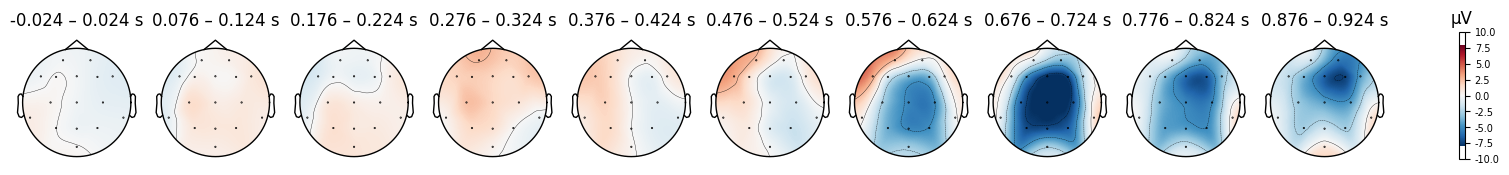

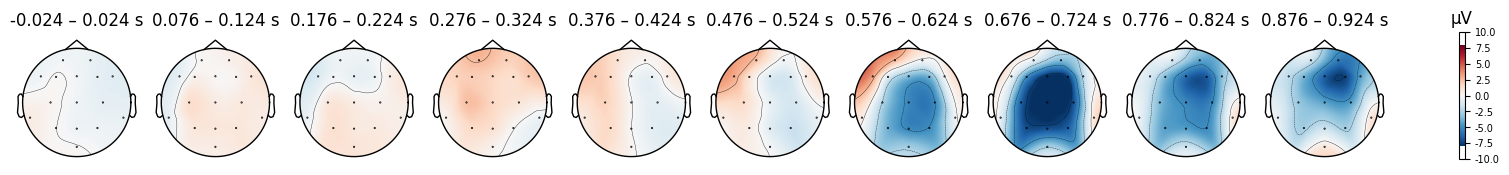

In [46]:
print(condition + "original Fcz reference")
evoked_diff.plot_topomap(times=times,vlim=(-8,8),average=0.050)

print(condition + "averaged references")
evoked_diff_avg.plot_topomap(times=times,vlim=(-8,8),average=0.050)

print(condition + "mastoid reference")
evoked_diff_mastoid.plot_topomap(times=times,vlim=(-8,8),average=0.050)     

.comment property on the Evoked object

In [48]:
evokeds_mastoidref['Match'].comment

'0.25 × Match/A + 0.25 × Match/C + 0.25 × Match/B + 0.25 × Match/D'

custom comments to Evoked objects

In [50]:
for condition in evokeds_mastoidref.keys():
    evokeds_mastoidref[condition].comment = condition

evokeds_mastoidref


{'Match': <Evoked | 'Match' (average, N=72), -0.1 – 1 s, baseline -0.1 – 0 s, 16 ch, ~99 kB>,
 'Mismatch': <Evoked | 'Mismatch' (average, N=71), -0.1 – 1 s, baseline -0.1 – 0 s, 16 ch, ~99 kB>}

saving evoked data to files as separate ones for seaprate conditions

In [52]:
for condition in evokeds_avgref.keys():
    mne.write_evokeds(data_dir+p_id+condition+"-arg-avg.fif",evokeds_mastoidref[condition],overwrite=True)


save difference wave data to file


In [53]:
mne.write_evokeds(data_dir+p_id+"Mismatch-match-arg-avg.fif",
                  evoked_diff_mastoid,overwrite=True)

In [57]:
#import os
# os.rename(data_dir+p_id+"Mismatch-match-arg-avg.fif",data_dir+p_id+"-Mismatch-match-arg-avg-eeg.fif")
# os.rename(data_dir+p_id+"Match"+"-arg-avg.fif",data_dir+p_id+"-"+"Match"+"-arg-avg-eeg.fif")